# Chemistry Assigment

The aim of the assignment is to validate the published densities’
data of elements in the periodic table by using cross checking them with atomic data.
Specifically, you are required to write a program that reads the atomic size of each element and its atomic weight,
calculate the **density of a single atom** (atomic weight/ atomic volume)
and compare the results with the tabulated density of the element (see second link).
Note that each element has a theoretical and an empirical size: Your calculation should be based on both.

You are further, required to calculate the distances between the atoms of a given element
that would result in an accurate estimation of the tabulated densities.
The results that you obtain should be compared with the published data
for number of atoms per unit volume (see the second link).

For those of you who want to learn more, you can attempt to visualise your results in a meaningful way.


Note: you are encouraged to work in groups but the submission is individual.


Atomic radii data:
https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page)

Density data with number of atoms per volume:
https://en.wikipedia.org/wiki/Talk%3AList_of_elements_by_density/Numeric_densities

In [1]:
AVOGADRO = 6.022e23
AVOGADRO_INV = 1.66054e-24

## Reading radii and other data

Note that I removed the trailing series of elements that did not have _any_ radius data.

In [2]:
import csv
import periodictable
import math
import numpy as np
import matplotlib.pyplot as plot
elements = {}
# Using DictReader and manipulating the file's header names
with open('radii.csv') as file:
    reader = csv.DictReader(file)
    count = 0
    for row in reader:
        count += 1
        #print(row)
        #if not 'no data' in [row['empirical'], row['calculated']]:
        s = row['symbol']
        if s in elements:
            print(s)
        element = {
            'number': int(row['number']),
            'symbol': s,
            'name': row['name'],
            'empirical_radius': int(row['empirical']) if 'no data' != row['empirical'] else None,
            'calculated_radius': int(row['calculated']) if 'no data' != row['calculated'] else None
        }
        element['mass'] = periodictable.elements[element['number']].mass
        elements[s] = element
        if not element['empirical_radius'] and not element['calculated_radius']:
            print(s, 'has missing data')

Fr has missing data


## Reading density and count

In [3]:
with open('density.csv') as file:
    skipped = []
    reader = csv.DictReader(file)
    for row in reader:
        s = row['symbol']
        if s not in elements:
            skipped.append(s)
            continue
        elements[s]['known_density'] = float(row['density'].split()[0])
        elements[s]['known_count'] = float(row['number of atoms per volume unit'].split()[0])
    print('Skipped', ', '.join(skipped))

Skipped Uuh, Uup, Lr, Uuq, Uut, Es, Cm, Uub, Bk, Cf, Rf, Rg, Ds, Sg, Mt, Bh, Db, Hs


## Calculating atomic density

$\text{atomic volume} = \frac{4\pi r^3}{3} \left[\text p \text m^3\right]$  
$\text{atomic density} = \frac{\text{atomic mass}}{\text{atomic volume}} = \frac{3m}{4\pi r^3} \left[\text{g} / \text{mol} \cdot \text{pm}^3\right]$

It would be rather futile to compare these values to the tabulated densities, since the assumptions and units are vastly different. See the next section.

In [4]:
atomic_volume = lambda r: 4*math.pi*r**3 / 3
atomic_density = lambda m, r: 3*m / (4*math.pi*r**3)

In [5]:
hydrogen = elements['H']
m, r = hydrogen['mass'], hydrogen['calculated_radius']
print(m, r)
print(atomic_volume(r))
print(atomic_density(m, r))

1.00794 53
623614.5193179835
1.6162869349198836e-06


In [6]:
for _, element in elements.items():
    d, c = element['known_density'], element['known_count']
    print(element['symbol'], '(' + element['name'] + ')', 'which has density',  d, 'and amount', c)
    
    if element.get('empirical_radius'):
        element['empirical_atomic_density'] = atomic_density(element['mass'], element['empirical_radius'])
        print('empirical:', element['empirical_atomic_density'],  end=' - ')
        print('compared:', str(d / element['empirical_atomic_density']), 'vs', c)
        
    if element.get('calculated_radius'):
        element['calculated_atomic_density'] = atomic_density(element['mass'], element['calculated_radius'])
        print('calculated:', element['calculated_atomic_density'], end=' - ')
        print('compared:', str(d / element['calculated_atomic_density']), 'vs', c)
        
    print()

H (hydrogen) which has density 8.988e-05 and amount 0.054
empirical: 1.540018880064432e-05 - compared: 5.8362920846944135 vs 0.054
calculated: 1.6162869349198836e-06 - compared: 55.60893802835521 vs 0.054

He (helium) which has density 0.0001785 and amount 0.027
empirical: 5.529808103554745e-07 - compared: 322.7960114660294 vs 0.027
calculated: 3.207515156571649e-05 - compared: 5.565055542583614 vs 0.027

Li (lithium) which has density 0.534 and amount 46.331
empirical: 5.435373947275471e-07 - compared: 982453.1029142388 vs 46.331
calculated: 3.5578204056613407e-07 - compared: 1500918.9310125904 vs 46.331

Be (beryllium) which has density 1.85 and amount 123.621
empirical: 1.8585465673389094e-06 - compared: 995401.4779671911 vs 123.621
calculated: 1.531395181828325e-06 - compared: 1208048.727038108 vs 123.621

B (boron) which has density 2.34 and amount 18.144
empirical: 4.202623463708073e-06 - compared: 556795.0638945329 vs 18.144
calculated: 3.9193992049386575e-06 - compared: 597030.


Os (osmium) which has density 22.61 and amount 71.577
empirical: 2.06709454877364e-05 - compared: 1093805.7968085688 vs 71.577
calculated: 7.172576903489526e-06 - compared: 3152284.082029155 vs 71.577

Ir (iridium) which has density 22.65 and amount 70.962
empirical: 1.865098960298421e-05 - compared: 1214412.772841605 vs 70.962
calculated: 7.868386238758963e-06 - compared: 2878608.0541430637 vs 70.962

Pt (platinum) which has density 21.46 and amount 66.246
empirical: 1.892859502422238e-05 - compared: 1133734.4357855537 vs 66.246
calculated: 8.398464407667116e-06 - compared: 2555229.022630466 vs 66.246

Au (gold) which has density 19.282 and amount 42.691
empirical: 1.9111842741202232e-05 - compared: 1008903.2366528914 vs 42.691
calculated: 8.925984407889077e-06 - compared: 2160209.9128649537 vs 42.691

Hg (mercury) which has density 13.5336 and amount 40.631
empirical: 1.4188840015468126e-05 - compared: 953820.0434458484 vs 40.631
calculated: 9.577062858388362e-06 - compared: 1413126

## Calculating normalized density

$\text{absolute density} = \frac{\text{mass of one atom}}{\text{atomic volume}} = \frac{3m}{4\pi r^3 \cdot N_A} \left[\text{g} / \text{cm}^3\right]$

This gives the theoretical density without _any_ distance between the atoms other than what is given by their radius.  
With the same unit as the tabulated densities, it should be possible to compare them - and compare the number of atoms we'd get, too.

In [7]:
volume = lambda r: 4*math.pi*(r*10**(-10))**3 / 3
amount_from_volume = lambda r: 1 / volume(r)
#density = lambda m, r: m / (volume(r)*AVOGADRO)
density = lambda m, r: m / AVOGADRO * amount_from_volume(r)

In [8]:
for s in ['H', 'Ag']:
    el = elements[s]
    m, r = el['mass'], el['calculated_radius']
    r = 25
    print('For', s, 'with', f'm={m}, r={r}')
    print(volume(r))
    print(1 / volume(r))
    print(density(m, r))
    print()

For H with m=1.00794, r=25
6.544984694978736e-26
1.527887453682195e+25
25.573212887154295

For Ag with m=107.8682, r=25
6.544984694978736e-26
1.527887453682195e+25
2736.806201117266



In [9]:
empirical_densities = []
calculated_densities = []
actual_densities = []
for _, element in elements.items():
    #if element['symbol'] in ['Ne', 'F']:
    #    continue
    d, c = element['known_density'], element['known_count']
    actual_densities.append(d)
    print(element['symbol'], '(' + element['name'] + ')', 'which has density',  d, 'and amount', c)
    
    if element.get('empirical_radius'):
        calc = density(element['mass'], element['empirical_radius'])
        empirical_densities.append(calc)
        print('empirical:', calc,  end=' - ')
        print('compared:', str(calc / element['mass'] * 602.2), 'vs', c)
    else:
        empirical_densities.append(0)
        
    if element.get('calculated_radius'):
        calc = density(element['mass'], element['calculated_radius'])
        calculated_densities.append(calc)
        print('calculated:', calc, end=' - ')
        print('compared:', str(calc / element['mass'] * 602.2), 'vs', c)
    else:
        calculated_densities.append(0)
    
    print()

H (hydrogen) which has density 8.988e-05 and amount 0.054
empirical: 25.573212887154295 - compared: 15278.874536821952 vs 0.054
calculated: 2.683970333643114 - compared: 1603.5547105183675 vs 0.054

He (helium) which has density 0.0001785 and amount 0.027
empirical: 0.9182677023505056 - compared: 138.15533254504805 vs 0.027
calculated: 53.26328722304298 - compared: 8013.575060852037 vs 0.027

Li (lithium) which has density 0.534 and amount 46.331
empirical: 0.9025861752367103 - compared: 78.30822572072424 vs 46.331
calculated: 0.5908037870576784 - compared: 51.25803782828613 vs 46.331

Be (beryllium) which has density 1.85 and amount 123.621
empirical: 3.086261320722201 - compared: 206.22603575237494 vs 123.621
calculated: 2.5430009661712467 - compared: 169.9250172520179 vs 123.621

B (boron) which has density 2.34 and amount 18.144
empirical: 6.978783566436521 - compared: 388.73586751531525 vs 18.144
calculated: 6.508467626932344 - compared: 362.5380820403902 vs 18.144

C (carbon) whi

### What this means

Unsurprisingly, elements that are gases at $0^{\circ} C$ have far lower density than if all the atoms had been squashed together, like what is the case for our densities.

Silver is particularly close to being as tightly packed as our numbers assume - $10.501$ compared to $10.440$ and $9.5195$.

Gases give absurdly different results, in the case of hydrogen $8.988 \cdot 10^{-5}$ versus $25.57$ and $2.684$

Please forgive the plot that turned out to be way less useful that I had hoped.

[95, 95, 95]
[13.26060173250199, 14.638929548751678, 7.444158858736845]
[60.25286841845662, 145.7922891997966, 22.65]


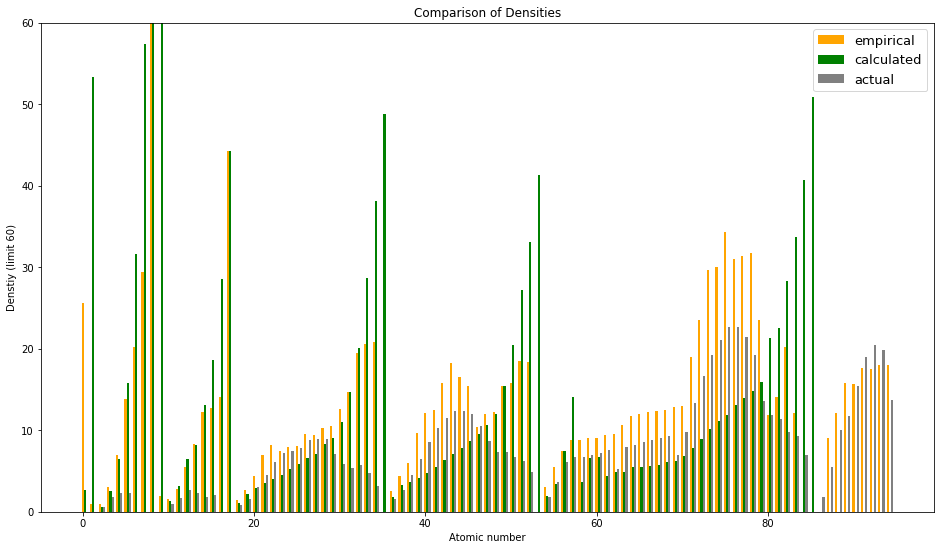

In [10]:
# for popup plot: %matplotlib tk

plot.rcParams['figure.figsize'] = [16, 9]
fig, ax = plot.subplots()
plot.ylim(0, 60)

types = ['empirical', 'calculated', 'actual']
colors = ['orange', 'green', 'grey']
data = [empirical_densities, calculated_densities, actual_densities]

print([len(l) for l in data])
print([np.average(l) for l in data])
print([np.max(l) for l in data])

x = np.arange(len(data[0]))
ax.bar(x + 0.00, data[0], color=colors[0], label=types[0], width=0.25)
ax.bar(x + 0.25, data[1], color=colors[1], label=types[1], width=0.25)
ax.bar(x + 0.50, data[2], color=colors[2], label=types[2], width=0.25)

ax.set_ylabel('Denstiy (limit 60)')
ax.set_xlabel('Atomic number')
ax.legend(prop={'size': 13})
ax.set_title('Comparison of Densities')
plot.show()

## Testing density data

$\frac{\text{g} / \text{cm}^3}{\text{g} / \text{mol}} \cdot \text{particles} / \text{mol} = \text{particles} / \text{cm}^3$

Number of atoms given as $10^{21}$ atoms per $\text{cm}^3$

That gives us the constant $6.022 \cdot 10^{23} \cdot 10^{-21} = 6.022 \cdot 10^2 = 602.2$

In [11]:
amount_from_density = lambda p, m: p / m * 602.2
for _, element in elements.items():
    print(element['name'], element['known_count'], end=' ')
    print('approx', amount_from_density(element['known_density'], element['mass']))

hydrogen 0.054 approx 0.05369936305732484
helium 0.027 approx 0.02685570536366094
lithium 46.331 approx 46.32975075637516
beryllium 123.621 approx 123.61823141166037
boron 18.144 approx 130.34390898159282
carbon 49.952 approx 113.66426602945708
nitrogen 0.054 approx 0.053767933917339555
oxygen 0.054 approx 0.05378600447516782
fluorine 0.054 approx 0.053758791686240245
neon 0.027 approx 0.026854699524769945
sodium 25.435 approx 25.43462592274738
magnesium 43.063 approx 43.0620695330179
aluminium 40.04 approx 60.21656734319593
silicon 130.347 approx 49.95051254205908
phosphorus 35.386 approx 35.384918221587625
sulfur 38.82 approx 38.819504132231415
chlorine 0.055 approx 0.054592581727921474
argon 0.027 approx 0.02688855862621408
potassium 13.277 approx 13.276700009974858
calcium 23.14 approx 23.139577823244675
scandium 23.53 approx 40.03869124215259
titanium 57.118 approx 57.11634320095264
vanadium 72.23 approx 72.22877221911409
chromium 82.811 approx 82.80871065329902
manganese 81.555 a

## Calculating distance from density

$1\text{cm}^3$ cube, mass equals density in $\text{g} / \text{cm}^3$

$$m = \rho V = \rho \cdot 1 \text{cm}^3$$

$$\text{mass of one atom} = m_a \cdot N_A^{-1} = \frac{m_a \text{g}/\text{mol}}{6.022 \cdot 10^{-23} \text{mol}^{-1}} \approx m_a \cdot 1.6605 \cdot 10^-24$$

$$\text{number of atoms} = \frac{\text{total mass}}{\text{mass of one atom}} = \frac{\rho}{m_u \cdot N_A^{-1}} = \frac{\rho}{\text m_\text u} \cdot N_A$$

Distance between atoms along wall - if we assume that atoms are evenly spaced in a grid-like fashion:

$$\frac{\text{length of wall}}{\sqrt[3]{\text{number of atoms}}} = \frac{1 \text{cm}}{\sqrt[3]{\text{number of atoms}}} = \text{distance} [\text{cm}]$$

Mulitplying by $10^7$ to get the distance in nanometer

**Note that this distance is between _centers_ of atoms, not between their perimeters.**

In order to find the distance between the "borders" of the atoms, simply take $\text{distance} - 2r$  
(in this case, $r$ is in pm and must be divided by $1000$ to get its nm equivalent)

To get the number of atoms from this distance, calculate $\text{number of atoms} = \frac{1^3}{\text{distance}^3}$

In [12]:
distance_from_density = lambda p, m: (p / m * AVOGADRO) ** (-1/3) * 10**7

In [13]:
for s in ['H', 'Ag']:
    p, m = elements[s]['known_density'], elements[s]['mass']
    print(distance_from_density(p, m))

2.6505965102879236
0.25741904454512066


In [14]:
print('   element  center-center empirical  calculated  my amount vs their amount')
for _, element in elements.items():
    print('%12s' % element['name'], end=' ')
    p, m = element['known_density'], element['mass']
    calc, empir = element['calculated_radius'], element['empirical_radius']
    dist = distance_from_density(p, m)
    print('%10f' % dist, end=' ')
    print('%10f' % (dist-2*empir/1000) if empir else '  no data ', end=' ')
    print('%10f' % (dist-2*calc/1000) if calc else '  no data ', end=' ')
    print('\t%10f  %10f' % (1 / dist**3, element['known_count']))

   element  center-center empirical  calculated  my amount vs their amount
    hydrogen   2.650597   2.600597   2.544597 	  0.053699    0.054000
      helium   3.339293   3.099293   3.277293 	  0.026856    0.027000
     lithium   0.278428  -0.011572  -0.055572 	 46.329751   46.331000
   beryllium   0.200742  -0.009258  -0.023258 	123.618231  123.621000
       boron   0.197229   0.027229   0.023229 	130.343909   18.144000
      carbon   0.206439   0.066439   0.072439 	113.664266   49.952000
    nitrogen   2.649469   2.519469   2.537469 	  0.053768    0.054000
      oxygen   2.649173   2.529173   2.553173 	  0.053786    0.054000
    fluorine   2.649619   2.549619   2.565619 	  0.053759    0.054000
        neon   3.339334   3.019334   3.263334 	  0.026855    0.027000
      sodium   0.340036  -0.019964  -0.039964 	 25.434626   25.435000
   magnesium   0.285300  -0.014700  -0.004700 	 43.062070   43.063000
   aluminium   0.255130   0.005130   0.019130 	 60.216567   40.040000
     silicon   